In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import csv
import glob
from shutil import copyfile

In [28]:
b = np.array([[0,0,255], # detached
              [0,96,127], # non residential
              [153, 51, 204], # terraced
              [160, 48, 112], # apartment
              [240, 176, 0], # block 1-4
              [192, 112, 0]]) # block 5+
def cmp_col(col):
    return np.apply_along_axis(lambda x: (x == col).all(), 1, b).any()

def to_binary(path, path_out):
    mask = cv2.imread(path)
    maskbin = np.apply_along_axis(cmp_col, 2, mask)
    cv2.imwrite(path_out, maskbin.astype('uint8') * 255)

In [ ]:
import os
for filename in glob.glob('data/*_mask.png'):
    base = filename[5:-9]
    to_binary(filename,"train/%s_building_mask.png" % base)
    copyfile("data/%s_image.jpg" % base, "train/%s_image.png" % base)

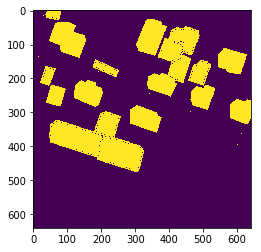

In [72]:
plt.imshow(maskbin)